<b>TASK 2:

<b>perfom data cleaning and exploratory data analysis (EDA) on a dataset of your choice , such as the Titanic dataset from kaggle. explore the relationship between variable and identify patterns and trends in the data.
</b>

In [2]:
import pandas as pd

# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_df = pd.read_csv(url)

# Display the first few rows of the dataset
titanic_df.head()

# Display the basic information about the dataset
titanic_df.info()

# Display summary statistics of the dataset
titanic_df.describe(include='all')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [3]:
# Check for missing values
missing_values = titanic_df.isnull().sum()

# Fill missing values in 'Age' with the median age
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

# Fill missing values in 'Embarked' with the most common port
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column due to a high number of missing values
titanic_df.drop(columns=['Cabin'], inplace=True)

# Verify that there are no more missing values
missing_values_after_cleaning = titanic_df.isnull().sum()

# Convert 'Survived' and 'Pclass' to categorical types
titanic_df['Survived'] = titanic_df['Survived'].astype('category')
titanic_df['Pclass'] = titanic_df['Pclass'].astype('category')

# Display the cleaned dataset information
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    object  
dtypes: category(2), float64(2), int64(3), object(4)
memory usage: 64.8+ KB


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the 'Age' feature
plt.figure(figsize=(10, 6))
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of the 'Sex' feature
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=titanic_df)
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

NameError: name 'titanic_df' is not defined

<Figure size 1000x600 with 0 Axes>

C:\Users\ghost\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


AttributeError: 'int' object has no attribute 'startswith'

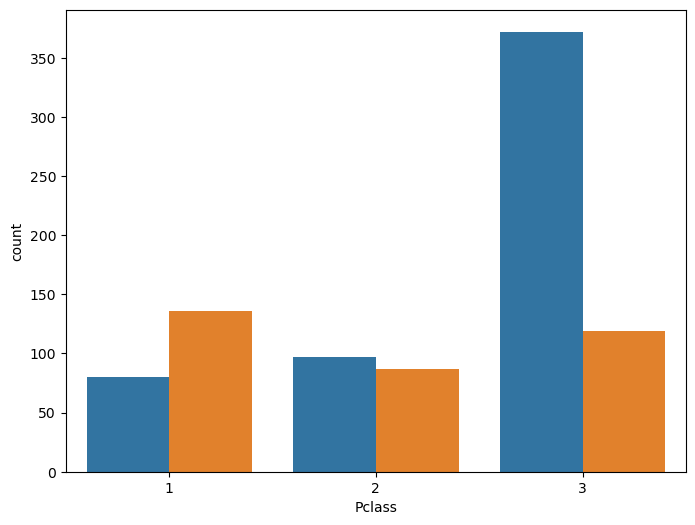

In [6]:
# Plot survival rate by 'Pclass'
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=titanic_df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

# Plot survival rate by 'Sex'
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=titanic_df)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

C:\Users\ghost\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\ghost\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\ghost\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

<Figure size 1000x600 with 0 Axes>

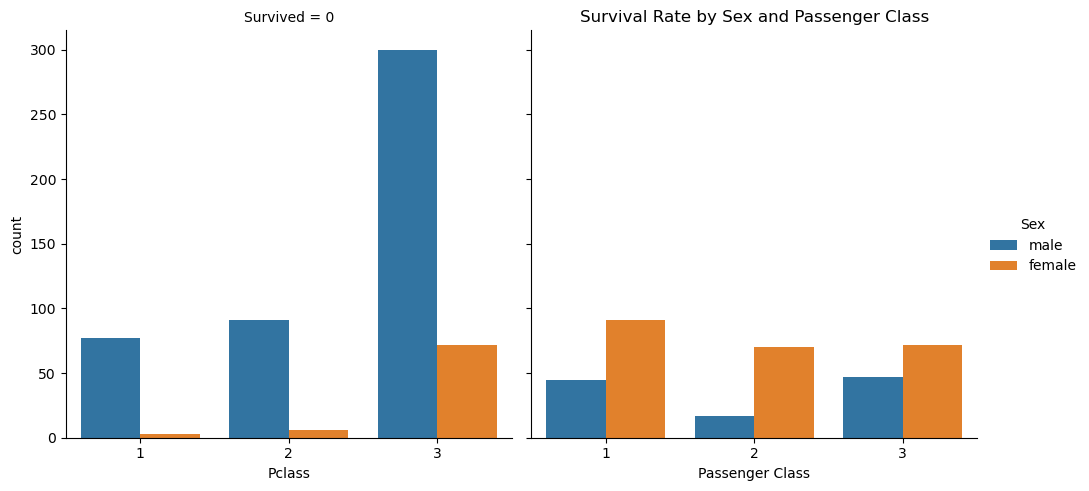

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

<Figure size 1200x800 with 0 Axes>

In [7]:
# Plot survival rate by 'Sex' and 'Pclass'
plt.figure(figsize=(10, 6))
sns.catplot(x='Pclass', hue='Sex', col='Survived', kind='count', data=titanic_df)
plt.title('Survival Rate by Sex and Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(titanic_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [5]:
# Display the basic information about the dataset
titanic_df.info()

# Display summary statistics of the dataset
titanic_df.describe(include='all')

NameError: name 'titanic_df' is not defined